In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [110]:
#loading data
Airlines  = pd.read_csv('C:/Users/OM/Desktop/EastWestAirlines.csv')
print(Airlines.columns)

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')


In [18]:
#chicking for null values
Airlines.isna().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [19]:
#chicking for duplicates
Airlines.duplicated().sum()

0

In [20]:
Airlines.dtypes

ID                   int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [27]:
#descriptive statistics
Airlines.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


<Axes: >

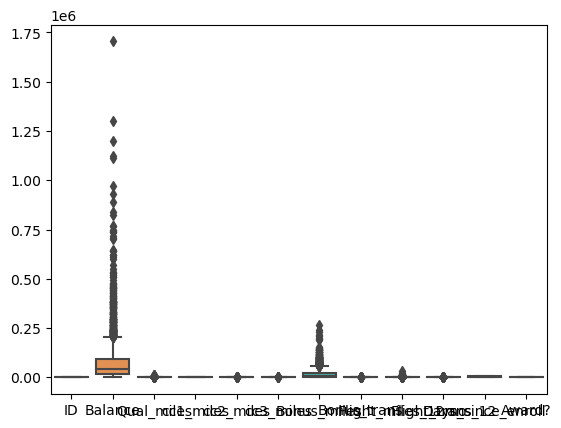

In [48]:
sns.boxplot(Airlines)

In [111]:
#Treatment of outliers
import pickle,joblib

def treat_outliers(Airlines):
    q3 = np.percentile(Airlines,75)
    q1 = np.percentile(Airlines,25)
    iqr = q3 - q1
    upper = q3 + (1.5 * iqr)
    lower = q1 - (1.5 * iqr)
    for i in range(0,len(Airlines)):
        if Airlines[i] > upper:
            Airlines[i] = upper
        elif Airlines[i] < lower:
            Airlines[i] = lower
    return Airlines


In [112]:
q3 = np.percentile(Airlines,75)
q1 = np.percentile(Airlines,25)
iqr = q3 - q1
upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)

In [113]:
#replacing Outliers with 
Airlines['Balance'] = np.where(Airlines['Balance']>upper,upper,Airlines['Balance'])
Airlines['Bonus_miles'] = np.where(Airlines['Bonus_miles']>upper,upper,Airlines['Bonus_miles'])
Airlines['Flight_miles_12mo'] = np.where(Airlines['Flight_miles_12mo']>upper,upper,Airlines['Flight_miles_12mo'])
Airlines['Qual_miles'] = np.where(Airlines['Qual_miles']>upper,upper,Airlines['Qual_miles'])

<Axes: >

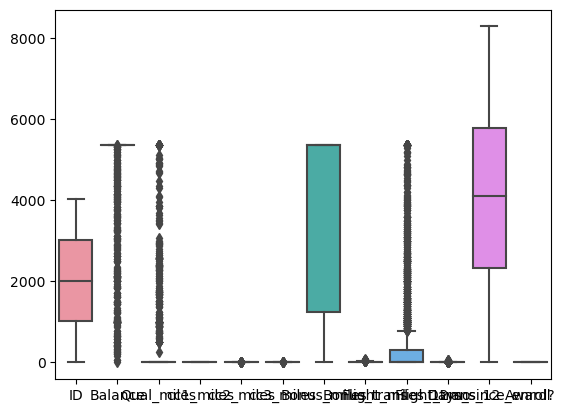

In [66]:
sns.boxplot(Airlines)


C:\Users\OM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\OM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\OM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\OM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\OM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:8

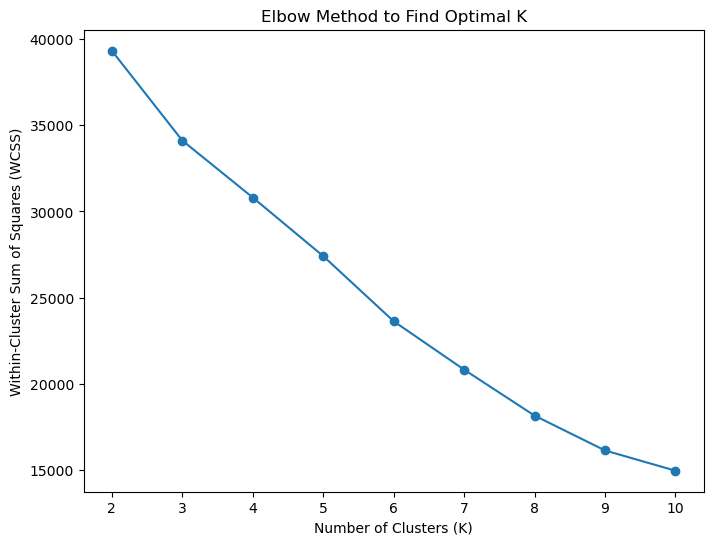

C:\Users\OM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\OM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\OM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\OM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\OM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:8

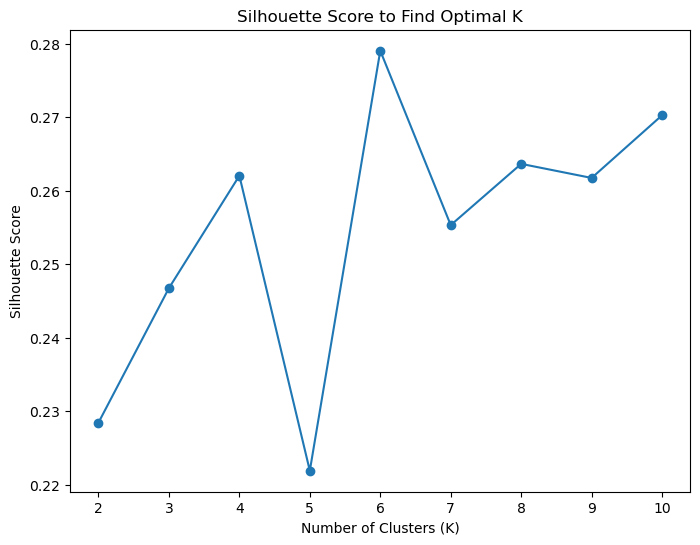

In [115]:
# Standardize the features for K-means
scaler = StandardScaler()
scaled_Airlines = scaler.fit_transform(Airlines)
# Find the optimal number of clusters using the elbow method
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_Airlines)
    wcss.append(kmeans.inertia_)
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method to Find Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Find the optimal number of clusters using silhouette score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_Airlines)
    silhouette_scores.append(silhouette_score(scaled_Airlines, kmeans_labels))

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score to Find Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()





In [132]:

# Choose the optimal value of k (based on the elbow curve and/or silhouette score)
optimal_k = 10


# Perform K-means clustering with the optimal value of k
kmeans = KMeans(n_clusters=optimal_k, random_state=123)
kmeans_labels = kmeans.fit_predict(scaled_Airlines)

# Add the cluster labels to the original dataset
Airlines['Cluster'] = kmeans_labels

# Analyze and interpret the clusters
cluster_summary = Airlines.groupby('Cluster').mean()
print(cluster_summary)


C:\Users\OM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                  ID      Balance   Qual_miles  cc1_miles  cc2_miles  \
Cluster                                                                
0        2600.522013  1610.220126     6.113208   1.081761   1.000000   
1        3067.969400  5350.263617    26.418605   2.271726   1.000000   
2        1130.469741  5344.239373    54.227666   3.427954   1.000000   
3        1135.107246  5317.546196    28.130435   1.000000   1.000000   
4        3137.395775  5285.181338    21.445070   1.000000   1.000000   
5        1892.796020  5300.110075   338.099502   2.203980   1.000000   
6        1664.866667  5360.625000    78.800000   3.466667   1.000000   
7        2045.478261  5360.625000  3838.289402   2.130435   1.000000   
8        2269.372093  5332.424419    23.255814   1.139535   2.348837   
9        1125.840830  5360.625000    14.046713   2.922145   1.000000   

         cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Cluster                                                           
0

In [133]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=optimal_k)
kmeans_labels = kmeans.fit_predict(Airlines)
silhouette_avg = silhouette_score(Airlines, kmeans_labels)
silhouette_avg

C:\Users\OM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.38226363290343823

In [134]:
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=optimal_k)
kmeans_labels = kmeans.fit_predict(Airlines)
db_index = davies_bouldin_score(Airlines, kmeans_labels)
db_index

C:\Users\OM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.8918872804556974